Extracting input/mnist/train-images-idx3-ubyte.gz
Extracting input/mnist/train-labels-idx1-ubyte.gz
Extracting input/mnist/t10k-images-idx3-ubyte.gz
Extracting input/mnist/t10k-labels-idx1-ubyte.gz
-------------- Tensorflow mnist softmax Result --------------
55000 784 10
accuracy:  91.6


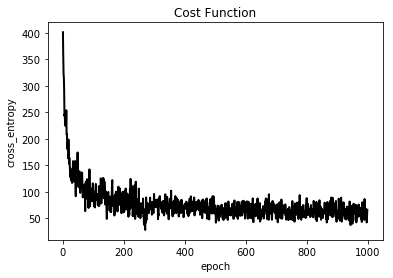


-------------- Tensorflow mnist CNN Result --------------
55000 784 10
step 0 accuracy 9.375 time:  1.2204921245574951 s
step 500 accuracy 98.4375 time:  293.70759201049805 s
step 1000 accuracy 97.6562 time:  589.042249917984 s
step 1500 accuracy 97.6562 time:  881.6184158325195 s
step 2000 accuracy 98.4375 time:  1169.8390169143677 s
step 2500 accuracy 100.0 time:  1458.2561948299408 s
step 2667 accuracy 99.2188 correct 21
step 2668 accuracy 100.0 correct 22
step 2669 accuracy 100.0 correct 23
step 2670 accuracy 98.4375 correct 24
step 3000 accuracy 98.4375 time:  1774.922888994217 s
step 3500 accuracy 99.2188 time:  2085.9425489902496 s
step 3534 accuracy 100.0 correct 21
step 3535 accuracy 99.2188 correct 22
step 3536 accuracy 98.4375 correct 23
step 3537 accuracy 98.4375 correct 24
step 3538 accuracy 100.0 correct 25
step 3539 accuracy 100.0 correct 26
step 3570 accuracy 98.4375 correct 21
step 3571 accuracy 99.2188 correct 22
step 3572 accuracy 98.4375 correct 23
step 3573 accura

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 7 21:28:46 2017

@author: cyrano
"""

import input_data
mnist = input_data.read_data_sets("input/mnist", one_hot=True)

import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#绘制代价函数示意图
def plotCost(all_cost):
    plt.plot(all_cost,'k-', label='line 1', linewidth=2)
    plt.ylabel("cross_entropy")
    plt.xlabel("epoch")
    plt.title("Cost Function")
    plt.show()        
    
###########################################################   

print("-------------- Tensorflow mnist softmax Result --------------") 

# First part: design the graph

# [55000, 784]
m,n = np.shape(mnist.train.images)
m,num = np.shape(mnist.train.labels)

#print("images: ", x_mat)
#print("labels: ", y_mat) # 10位长的one-hot encoding, m = 55000
print(m,n,num)

# 迭代次数
rate = 0.001
epoch = 1000
batch = 200

all_cost = []

x = tf.placeholder("float", [None, n])
y = tf.placeholder("float", [None, num])

# [784, 10]
W = tf.Variable(tf.ones([n,num]))
# [10]
b = tf.Variable(tf.constant(0.1, shape=[num]))

# exp(logit)/tf.reduce_sum(exp(logits)) logits - nn最后一层输出值
y_hat = tf.nn.softmax(tf.matmul(x,W) + b)

#判断预测值与真实值是否相等
#返回指定维度中值最大的索引，即比较one-hot编码值所在索引位置
#如相同，表示预测与真实相同
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))  

#求所有项比较结果的平均数
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))*100

#交叉熵作为代价函数
#cross_entropy = -tf.reduce_sum(y*tf.log(y_hat)-(1-y)*tf.log(1-y_hat))
cross_entropy = -tf.reduce_sum(y*tf.log(y_hat))

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cross_entropy)

init = tf.global_variables_initializer()

# Second part: launch the graph
  
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        batch_xs, batch_ys = mnist.train.next_batch(batch)
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
        all_cost.append(sess.run(cross_entropy, feed_dict={x: batch_xs, y: batch_ys}))

    accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("accuracy: ", accuracy)

plotCost(all_cost)

print()


print("-------------- Tensorflow mnist CNN Result --------------") 

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First part: design the graph

# [55000, 784]
m,n = np.shape(mnist.train.images)
m,num = np.shape(mnist.train.labels)

#print("images: ", x_mat)
#print("labels: ", y_mat) # 10位长的one-hot encoding, m = 55000
print(m,n,num)

# 原始输入
x = tf.placeholder("float", [None, n])
y = tf.placeholder("float", [None, num])

# 第一层输入，x变换成 28*28*1(通道)
x_image = tf.reshape(x, [-1,28,28,1])

# 第一层卷积
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# 第一层输出，作为第二层输入
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# 第一层池化
h_pool1 = max_pool_2x2(h_conv1)


# 第二层卷积
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# 第二层输出
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# 第二层池化
h_pool2 = max_pool_2x2(h_conv2)

# 全连接层
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

# 全连接层输出
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout, 防止过拟合
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 全连接层 softmax regression
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

#判断预测值与真实值是否相等
#返回指定维度中值最大的索引，即比较one-hot编码值所在索引位置
#如相同，表示预测与真实相同
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))

#求所有项比较结果的平均数
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))*100

# 交叉熵作代价函数
cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

# Second part: launch the graph

t0 = time.time()  # 打开深度学习计时器

# 迭代次数
rate = 0.0001
epoch = 10000
batch = 128 # 2的幂次
correct = 0
max_correct = 30

all_cost = []

optimizer = tf.train.AdamOptimizer(rate).minimize(cross_entropy)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        batch_xs, batch_ys = mnist.train.next_batch(batch)
        optimizer.run(feed_dict={x:batch_xs, y:batch_ys, keep_prob: 0.5})
        
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y:batch_ys, keep_prob: 1.0})
        
        # 每迭代500次输出结果
        if i % 500 == 0:
            print("step", i, "accuracy", train_accuracy, "time: ",(time.time() - t0), "s")
        
        # 判断连续20次超过98，则结束训练
        if (train_accuracy >= 98):
            correct+=1
            if (correct>20):
                print("step", i, "accuracy", train_accuracy, "correct", correct)
        else:
            correct=0
        
        if (correct>=max_correct):
            break            
                     
    accuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob: 1.0})


print("accuracy: ", accuracy)
print("time: ",(time.time() - t0), "s")

#plotCost(all_cost)
